In [1]:
import rdkit
import pandas as pd
from rdkit.Chem import PandasTools
import mols2grid
import copy
from rdkit.Chem import AllChem
from rdkit import Chem
from rdkit.Chem import Draw


Display the 2D cooridnates from the SDF file.

In [ ]:

df = PandasTools.LoadSDF("mols_ph6_ph8_pymol_selected.sdf")
df['SMILES'] = df['ROMol'].apply(Chem.MolToSmiles)
mols2grid.display(df,
                 # RDKit's MolDrawOptions parameters
                  fixedBondLength=60,
                  # set the fields  displayed on the grid
                  #subset=['ID', 'img','Cluster'],
                  subset=['ID'],
                  #set the fields displayed on mouse hover
                  tooltip=['ID'],
                  size=(300, 300),
                )

MolGridWidget()

It is difficult to visualize the 3D cooridnates, we convert them to 2D and display

In [3]:
# Load the SDF file
mols = [m for m in Chem.SDMolSupplier("mols.sdf")]
mols2D = copy.deepcopy(mols)
for m in mols2D:
    AllChem.Compute2DCoords(m)


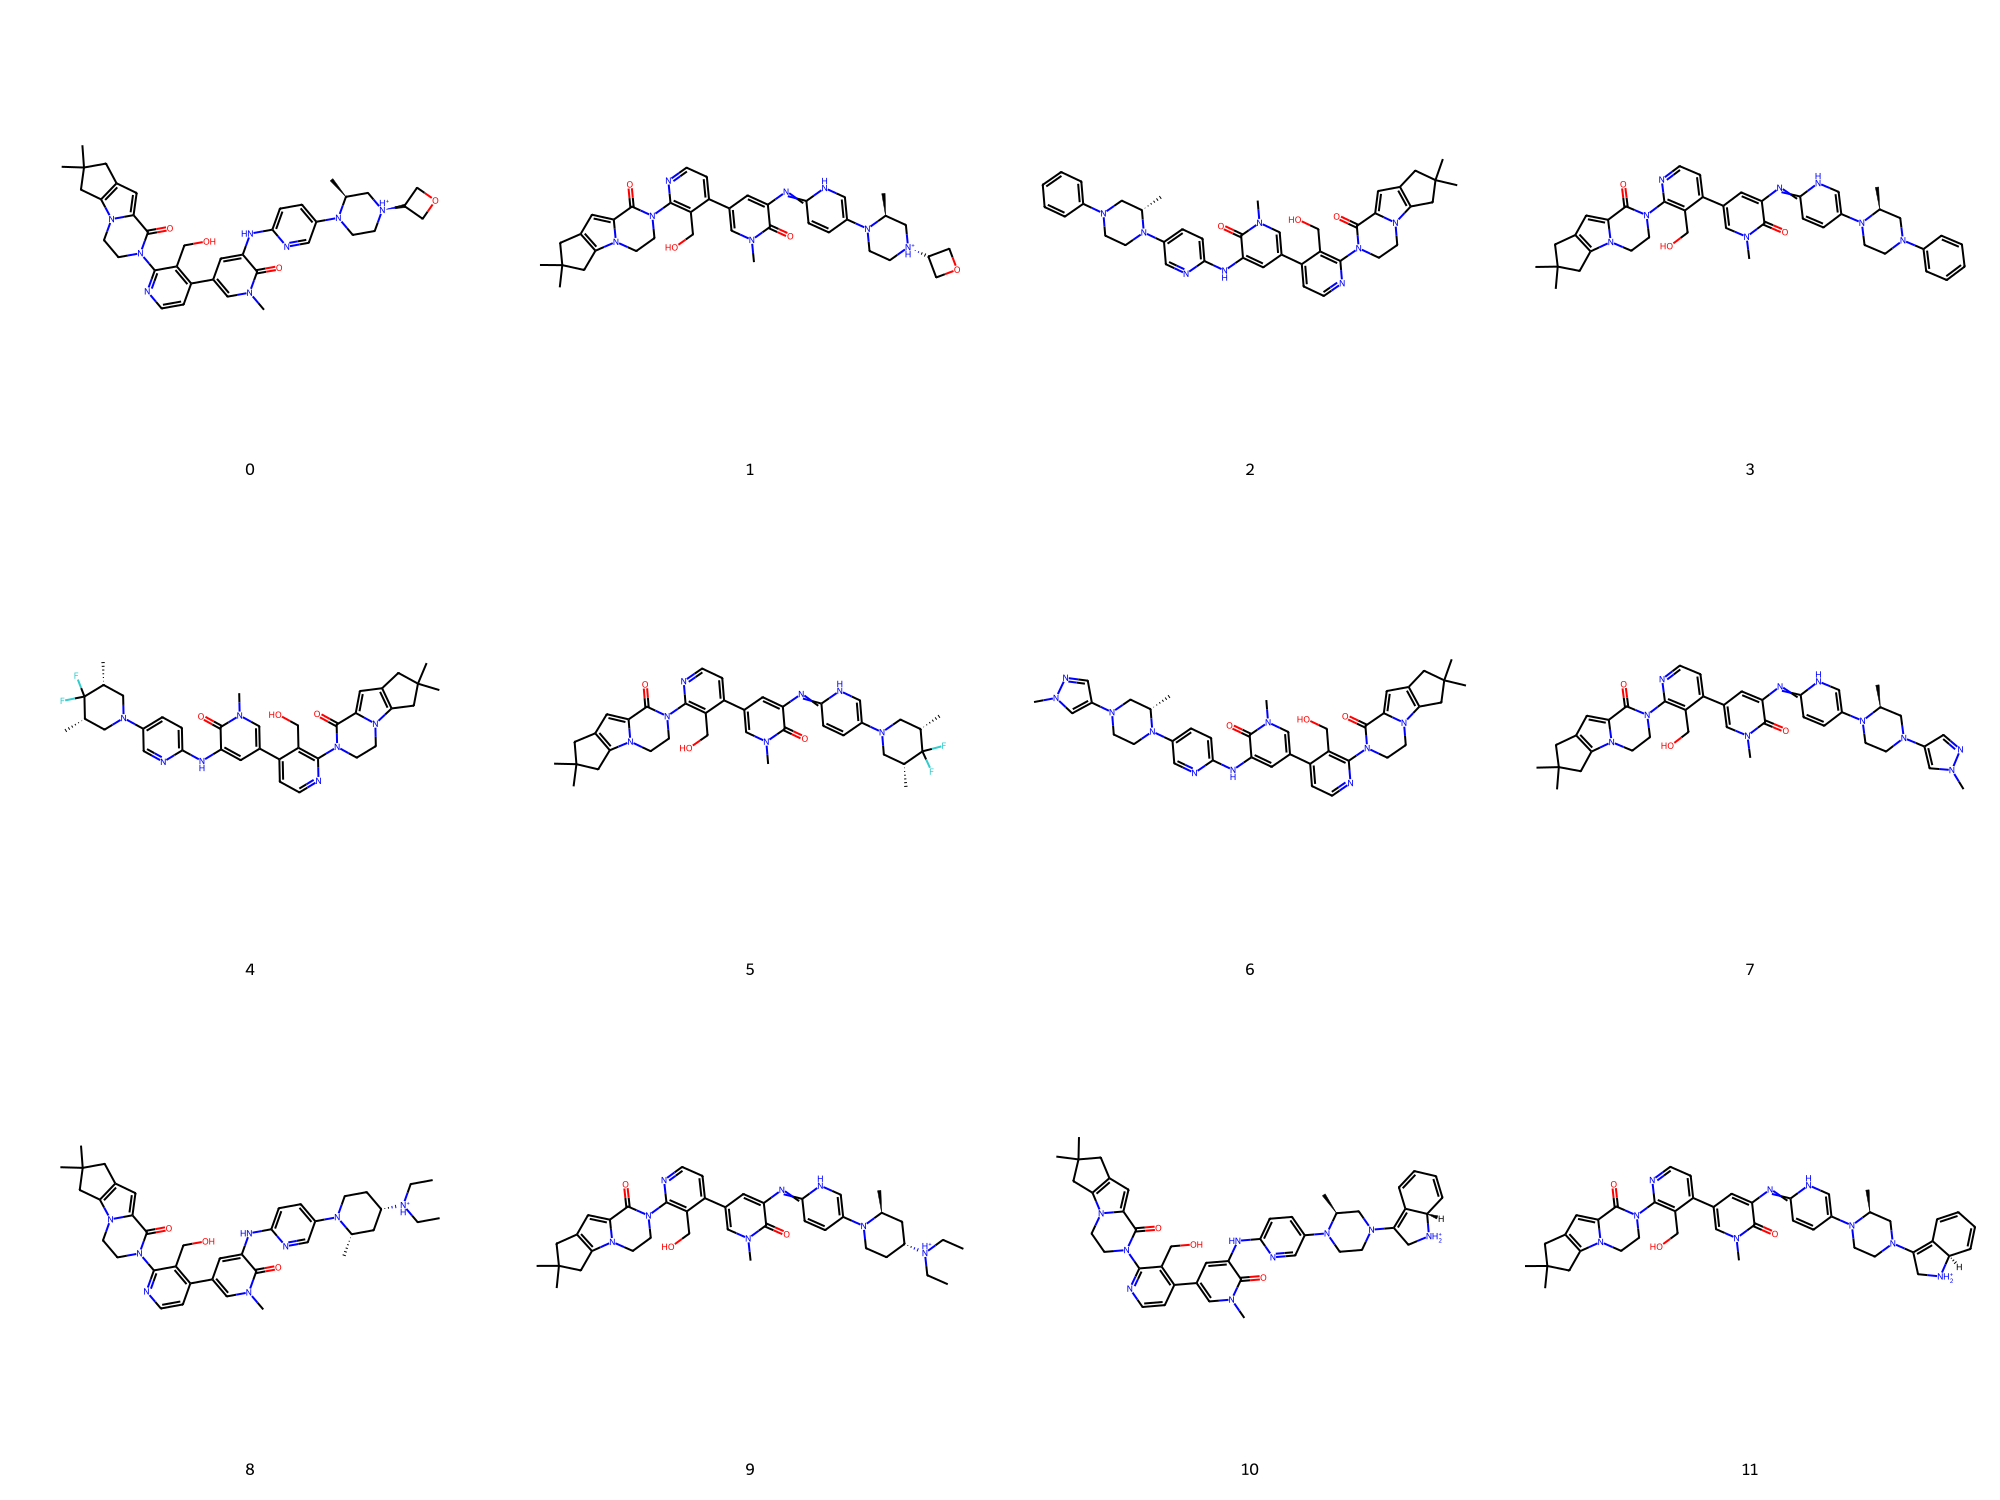

In [4]:
Draw.MolsToGridImage(mols2D[:12], molsPerRow=4, subImgSize=(500, 500), legends=[str(i) for i in range(12)])